In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
import pylab as pl

In [7]:

sales = pd.read_csv('sales_data_without_commas.csv', sep='\s*,\s*',
                           header=0, engine='python')

In [8]:

sales = pd.DataFrame( data = sales )
    

In [9]:
sales

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,This keyboard is very easy to type on but the ...,Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Our original keyboard was okay but did not hav...,Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
5,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,purchased to replace original surface pro 3 ke...,big improvement,gjohnsonxc,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
6,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I find it very comfortable to type with it but...,Perfect type cover,nakulrk,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
7,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,False,0.0,3.0,http://reviews.bestbuy.com/3545/4562009/review...,Good Keyboard and addition to the Surface Pro ...,Good Keyboard,Angie,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
8,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/

In [10]:
#using Best Buy API to grab prices for items
price_df = pd.read_json('https://raw.githubusercontent.com/BestBuyAPIs/open-data-set/master/products.json')

In [11]:
price_df

,category,description,image,manufacturer,model,name,price,shipping,sku,type,upc,url
0,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN2400B4Z,Duracell - AAA Batteries (4-Pack),5.49,5.49,43900,HardGood,41333424019,http://www.bestbuy.com/site/duracell-aaa-batte...
1,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN1500B4Z,Duracell - AA 1.5V CopperTop Batteries (4-Pack),5.49,5.49,48530,HardGood,41333415017,http://www.bestbuy.com/site/duracell-aa-1-5v-c...
2,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN1500B8Z,Duracell - AA Batteries (8-Pack),7.49,5.49,127687,HardGood,41333825014,http://www.bestbuy.com/site/duracell-aa-batter...
3,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,Energizer,E91BP-4,Energizer - MAX Batteries AA (4-Pack),4.99,5.49,150115,HardGood,39800011329,http://www.bestbuy.com/site/energizer-max-batt...
4,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN1400R4Z,Duracell - C Batteries (4-Pack),8.99,5.49,185230,HardGood,41333440019,http://www.bestbuy.com/site/duracell-c-batteri...
5,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; D s...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN1300R4Z,Duracell - D Batteries (4-Pack),9.99,5.99,185267,HardGood,41333430010,http://www.bestbuy.com/site/duracell-d-batteri...
6,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; alk...,http://img.bbystatic.com/BestBuy_US/images/pro...,Duracell,MN1604B2Z,Duracell - 9V Batteries (2-Pack),7.99,5.49,312290,HardGood,41333216010,http://www.bestbuy.com/site/duracell-9v-batter...
7,"[{'id': 'pcmcat113100050015', 'name': 'Carfi I...",From our expanded online assortment; compatibl...,http://img.bbystatic.com/BestBuy_US/images/pro...,Directed Electronics,506T,Directed Electronics - Viper Audio Glass Break...,39.99,0,324884,HardGood,93207005060,http://www.bestbuy.com/site/directed-electroni...
8,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Alkaline batteries; 1.5V,http://img.bbystatic.com/BestBuy_US/images/pro...,Energizer,E90BP-2,Energizer - N Cell E90 Batteries (2-Pack),5.99,5.49,333179,HardGood,39800013200,http://www.bestbuy.com/site/energizer-n-cell-e...
9,"[{'id': 'abcat0300000', 'name': 'Car Electroni...",From our expanded online assortment; compatibl...,http://img.bbystatic.com/BestBuy_US/images/pro...,Metra,99-5512,Metra - Radio Installation Dash Kit for Most 1...,16.99,0,346575,HardGood,86429002757,http://www.bestbuy.com/site/metra-radio-instal...


## Get prices data

In [12]:
logitech = price_df.loc[price_df['manufacturer'] == 'Logitech'].price.values

In [13]:
microsoft = price_df.loc[price_df['manufacturer'] == 'Microsoft'].price.values

In [14]:
sony = logitech = price_df.loc[price_df['manufacturer'] == 'Sony'].price.values

In [15]:
jbl = logitech = price_df.loc[price_df['manufacturer'] == 'JBL'].price.values

In [16]:
samsung = logitech = price_df.loc[price_df['manufacturer'] == 'Samsung'].price.values

In [17]:
import numpy as np
import scipy.stats as stats
import pylab as pl

In [18]:
logitech = logitech.astype(int)

In [32]:
logitech_sorted = sorted(logitech)

In [36]:
fit = stats.norm.pdf(logitech_sorted, np.mean(logitech_sorted), np.std(logitech_sorted))

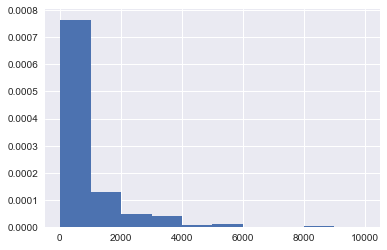

In [48]:

pl.hist(logitech_sorted,normed=True)   
pl.show() 

In [46]:
fit = stats.norm.pdf(microsoft, np.mean(microsoft), np.std(microsoft))

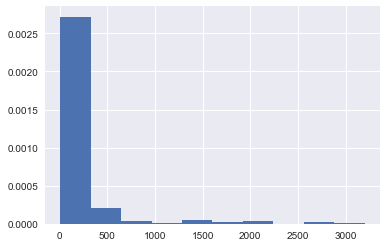

In [50]:
pl.hist(microsoft,normed=True)   
pl.show() 

In [51]:
fit = stats.norm.pdf(sony, np.mean(sony), np.std(sony))

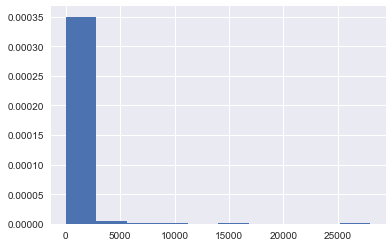

In [52]:
pl.hist(sony,normed=True)   
pl.show() 